## Урок 4. Визуальный анализ данных

#### Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.1. Скачать данные в закрепе к уроку (данные по недвижимости)

In [2]:
df = pd.read_csv('C:/Users/Татьяна/Downloads/seminar2 Pandas/kc_house_data.csv', encoding= 'latin-1')
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


#### 1.2 Изучите стоимость недвижимости

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

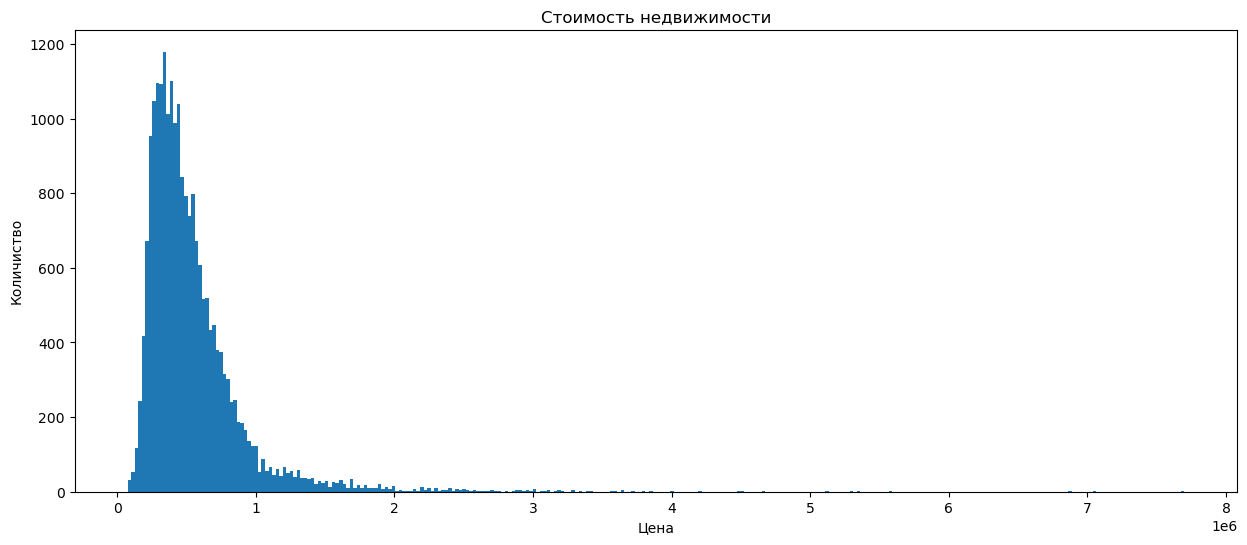

In [3]:
plt.figure(figsize=(15, 6))
plt.hist(df['price'], bins=300)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количиство')
df['price'].describe()

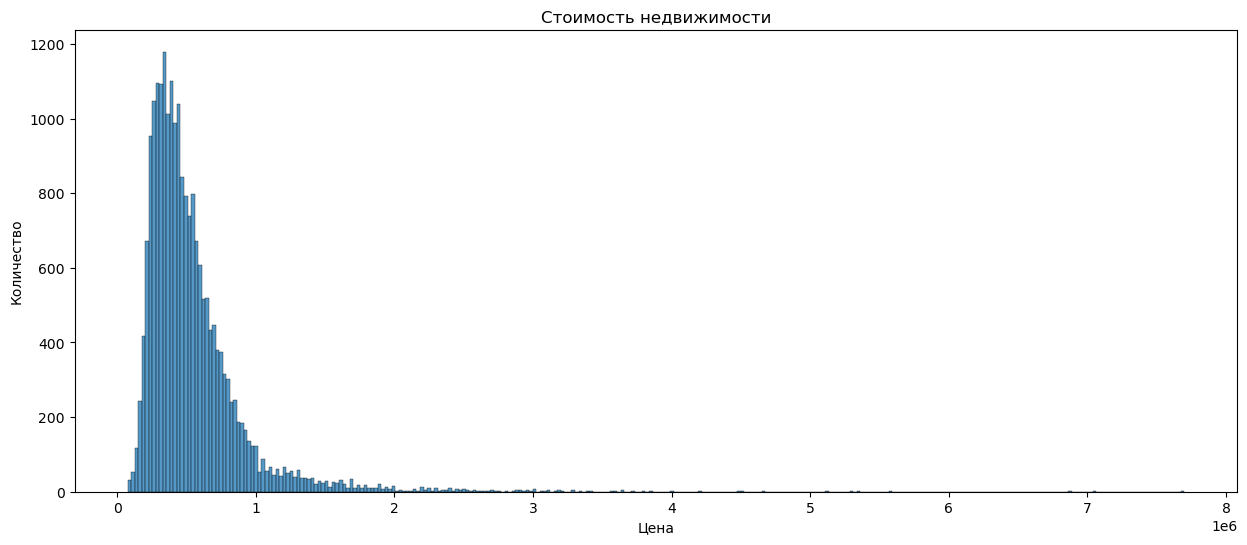

In [4]:
plt.figure(figsize=(15, 6))
sns.histplot(df['price'], bins=300)
plt.title('Стоимость недвижимости')
plt.xlabel('Цена')
plt.ylabel('Количество');

Вывод: большинство домов стоимостью до 1 млн.

#### 1.3 Изучите распределение квадратуры жилой

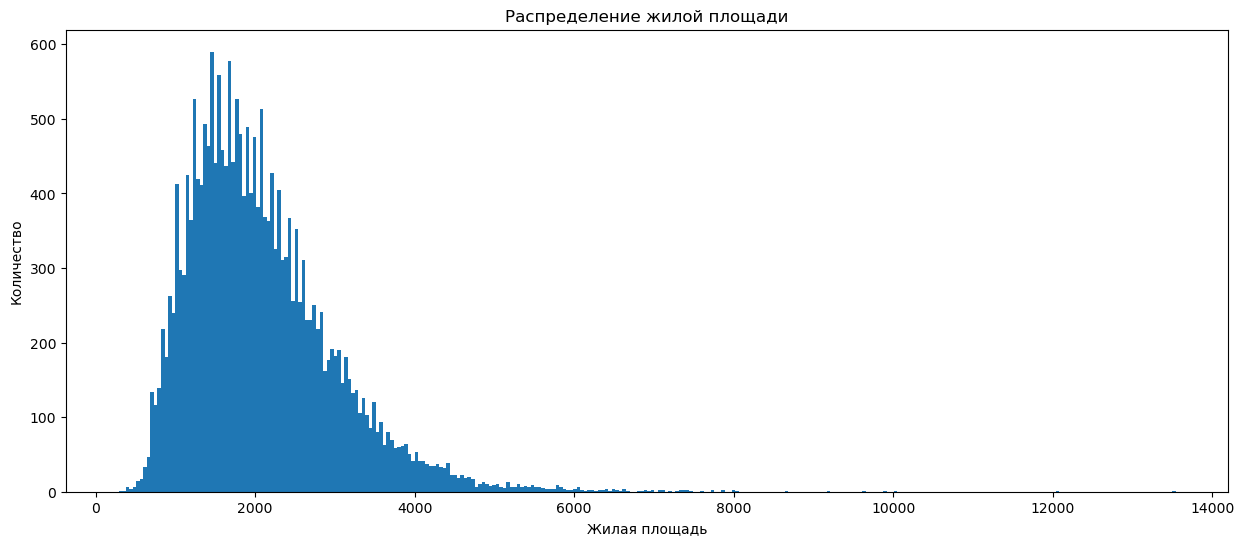

In [5]:
plt.figure(figsize=(15, 6))
plt.hist(df['sqft_living'], bins=300)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

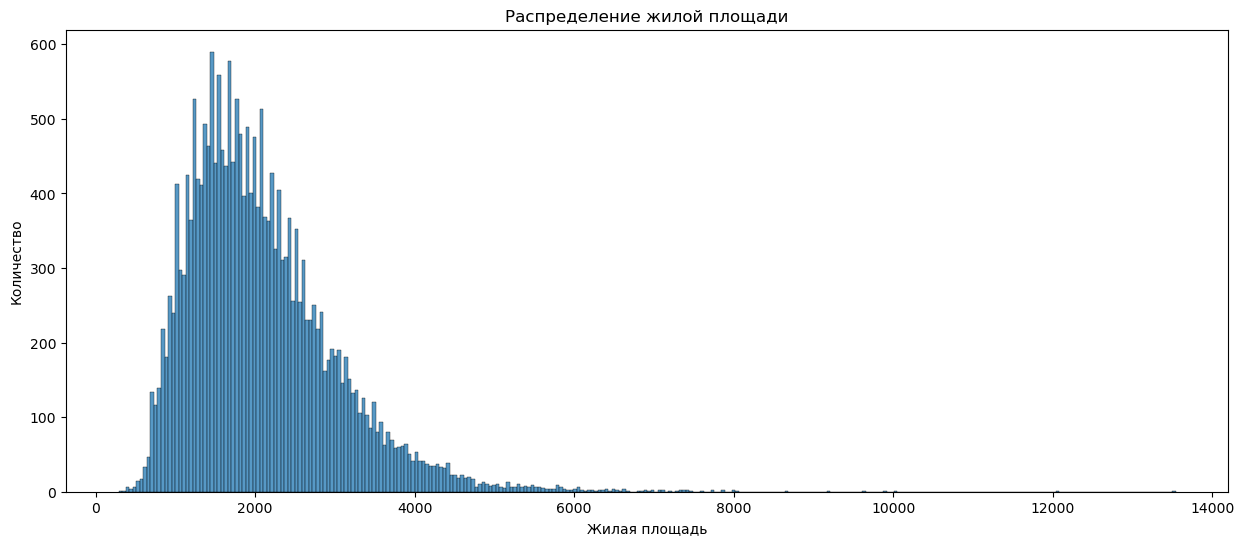

In [6]:
plt.figure(figsize=(15, 6))
sns.histplot(df['sqft_living'], bins=300)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество');

Вывод: в среднем, жилая площадь колеблется в диапазоне 1500-2500 кв.м.

#### 1.4 Изучите распределение года постройки

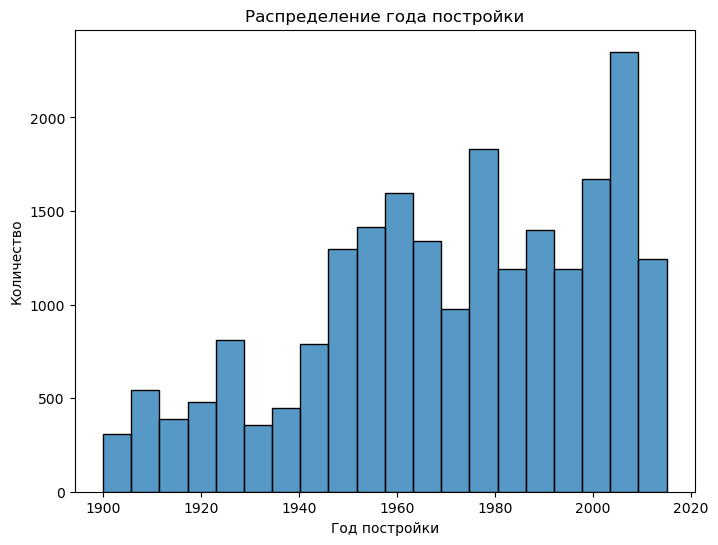

In [7]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yr_built'], bins=20)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

Вывод: чем новее постройка, тем чаще она покупается. Всплеск продаж отмечается в диапазоне 2005-2010 годов. Спад- между 1930 и 1940 годами.

## 2 задача

#### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

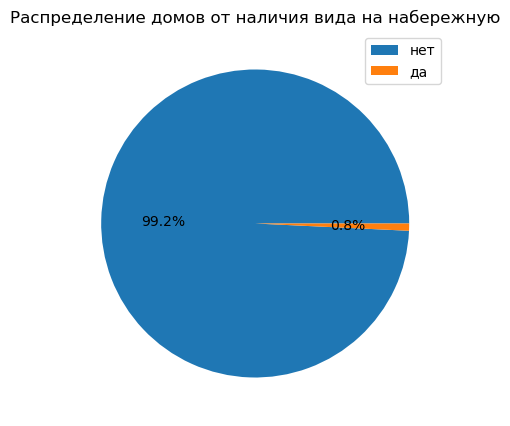

In [8]:
data = df['waterfront'].value_counts()
data.index = ['нет', 'да']
plt.figure(figsize=(5, 5))
plt.pie(df['waterfront'].value_counts(), autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(data.index, loc = 'upper right');

Вывод: домов с видом на набережную менее 1%

#### 2.2 Изучите распределение этажей домов

In [9]:
df_fl = df['floors'].value_counts()
df_fl

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

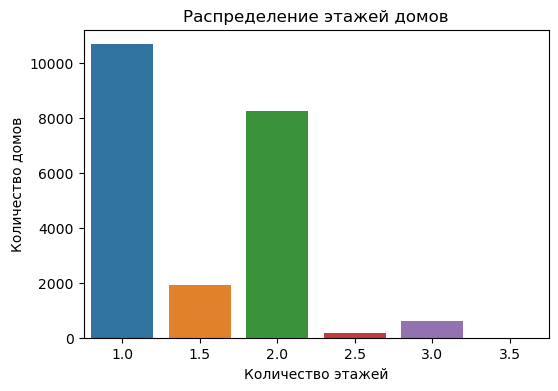

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x = df_fl.index, y = df_fl)
plt.title('Распределение этажей домов')
plt.xlabel('Количество этажей')
plt.ylabel('Количество домов');

Вывод: большинство домов одно- и двухэтажные.

#### 2.3 Изучите распределение состояния домов

In [11]:
df_con = df['condition'].value_counts()
df_con

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

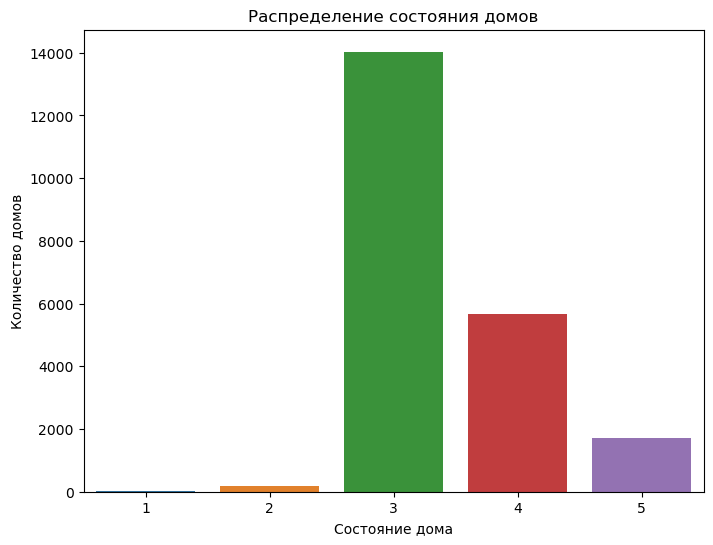

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x = df_con.index, y = df_con)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество домов');

Вывод: основная масса домов имеет оценку состояния, равную 3 баллам.

## 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

#### 1 график 

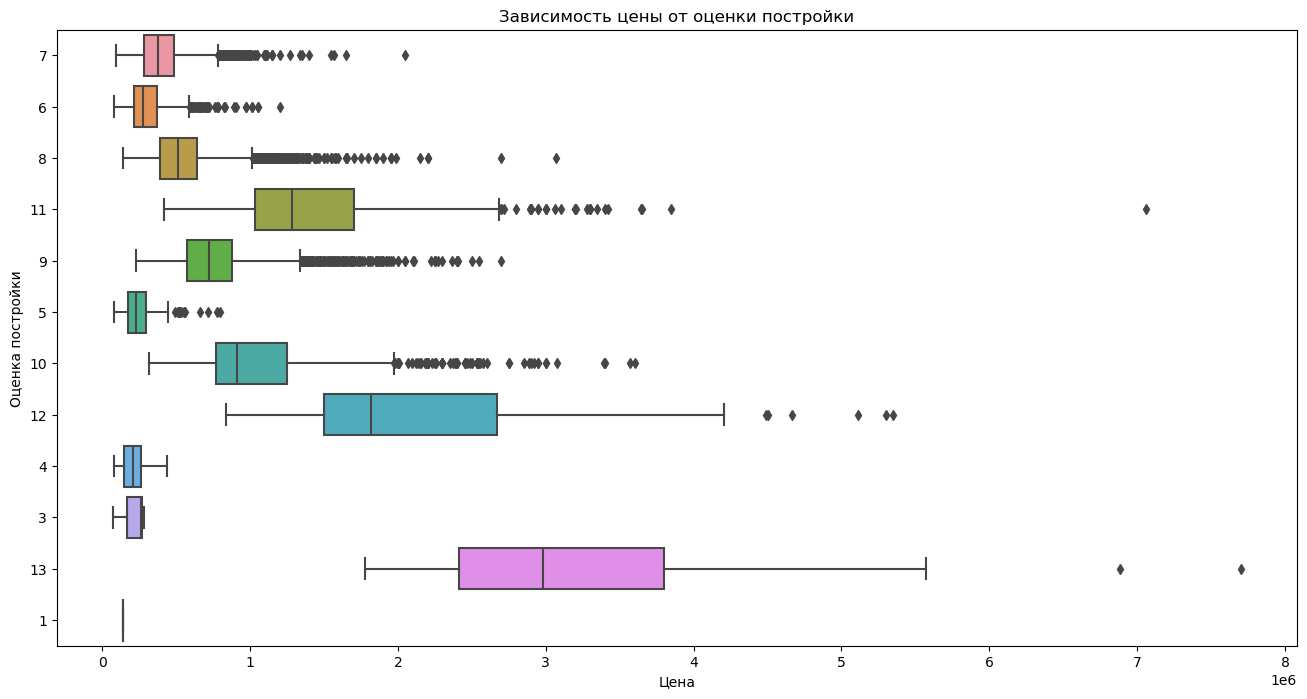

In [13]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = df['price'], y = df['grade'].astype('str'), whis = 1.5)
plt.title('Зависимость цены от оценки постройки')
plt.xlabel('Цена')
plt.ylabel('Оценка постройки');

Вывод: чем выше оценка постройки, тем выше цена (ящики 13,12 и 11 имеют наибольшую цену)

#### 2 график 

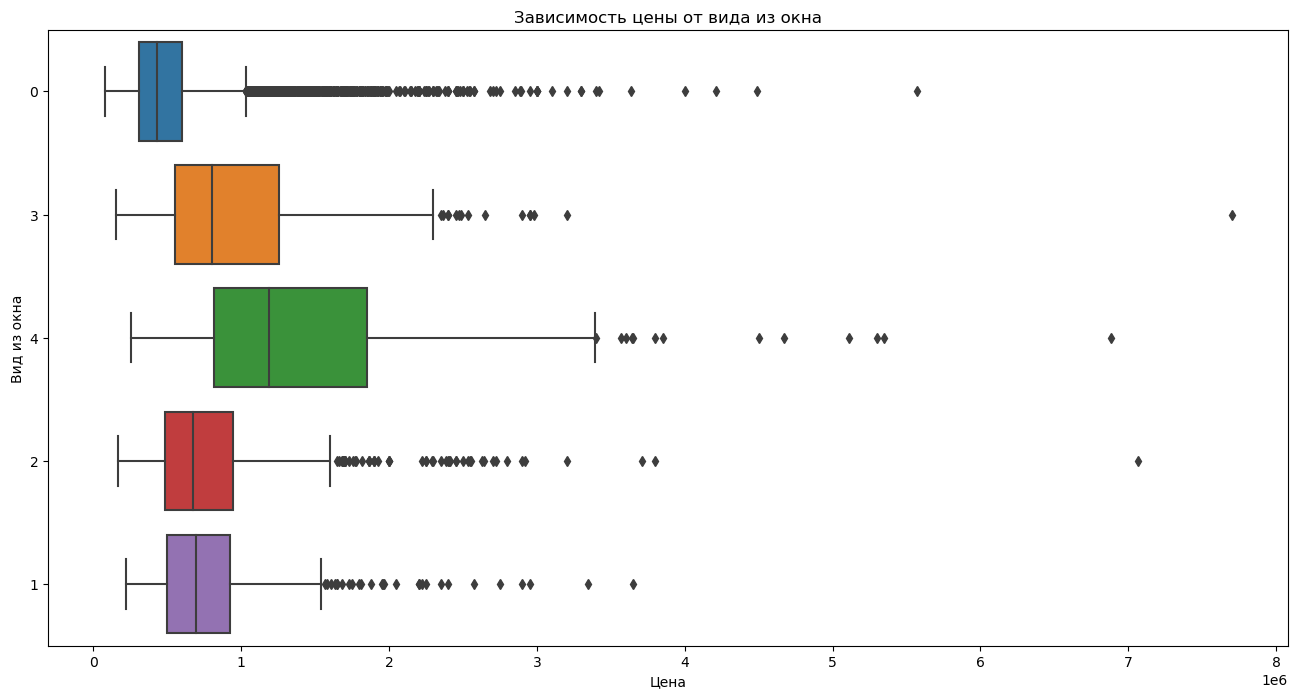

In [14]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = df['price'], y = df['view'].astype('str'), whis = 1.5)
plt.title('Зависимость цены от вида из окна')
plt.xlabel('Цена')
plt.ylabel('Вид из окна');

Вывод: чем лучше вид, тем дороже жилье (ящик 4 правее остальных)

#### 3 график 

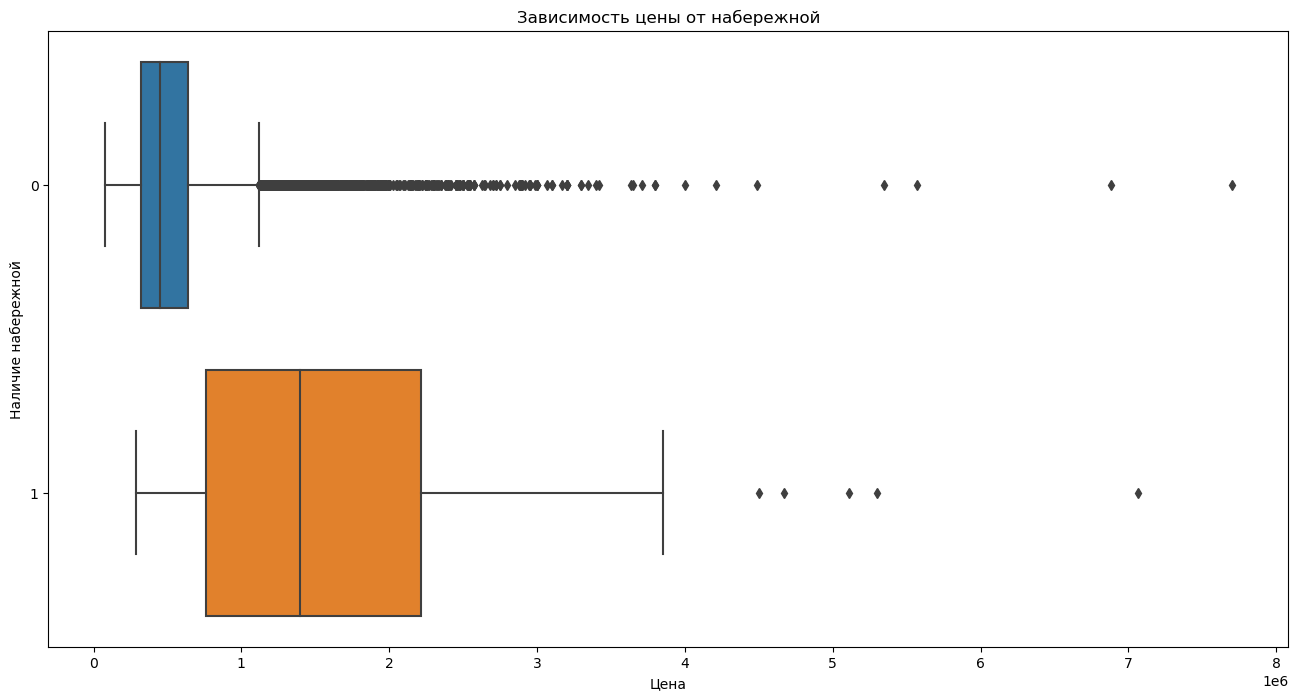

In [16]:
plt.figure(figsize = (16, 8))
sns.boxplot(x = df['price'], y = df['waterfront'].astype('str'), whis = 1.5)
plt.title('Зависимость цены от набережной')
plt.xlabel('Цена')
plt.ylabel('Наличие набережной');

In [ ]:
Вывод: наличие рядом набережной увеличивает стоимость дома

#### 4 график 

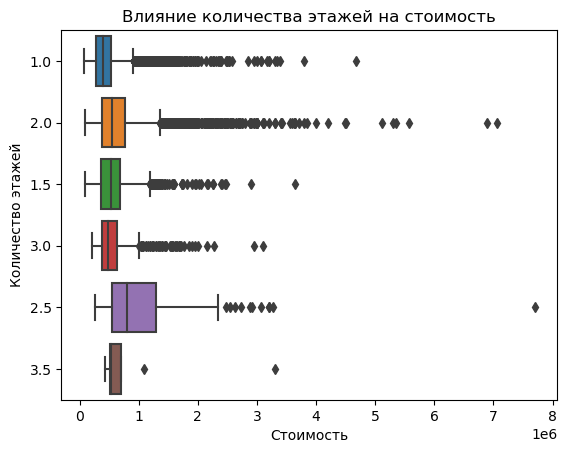

In [21]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Количество этажей')
plt.title('Влияние количества этажей на стоимость');

In [ ]:
Вывод: дома с количеством этажей 2,5 имеют наибольшую стоимость

#### 5 график 

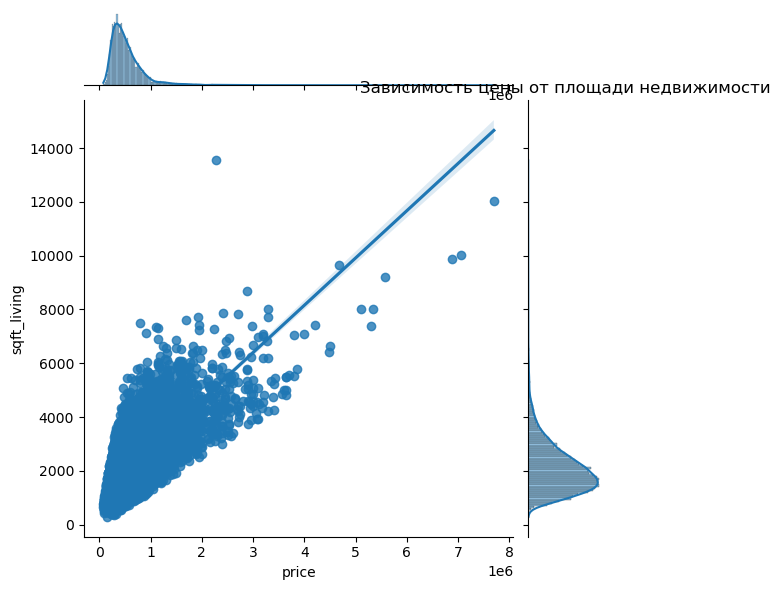

In [20]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость')
plt.ylabel('Жилая площадь')
plt.title('Зависимость цены от площади недвижимости');

In [ ]:
Вывод: чем больше площадь, тем дороже жилье (прямая зависимость)

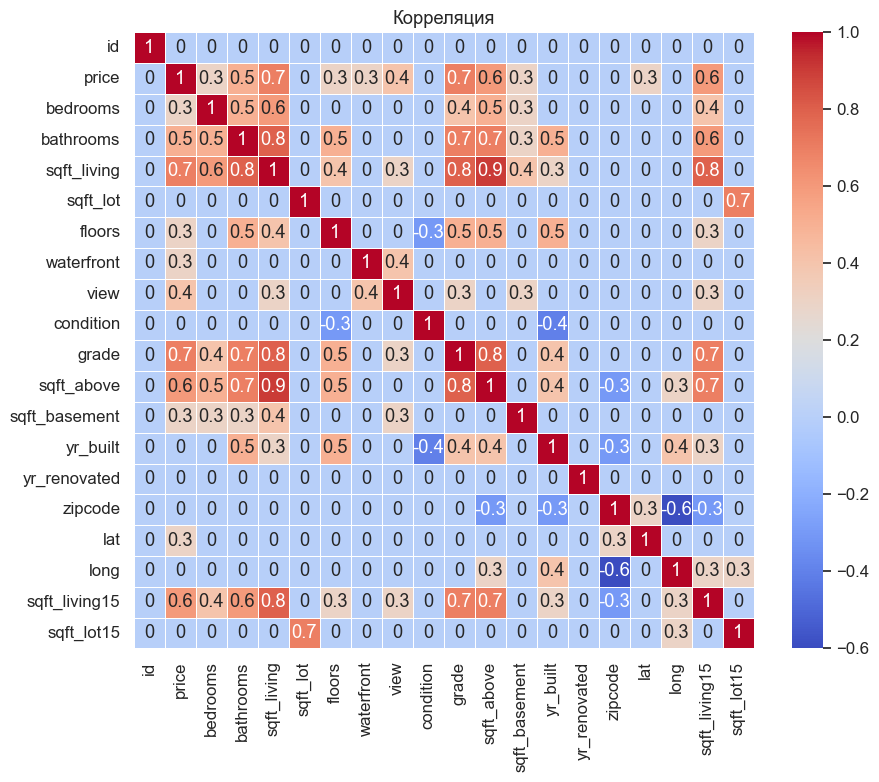

In [22]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.1)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Корреляция')
plt.xticks(rotation=90);

In [ ]:
Вывод: наибольшее влияние на цену оказывает жилая площадь и оценка недвижимости, наименьшее влияние - количество спален, год постройки и ремонта.